In [21]:
import os
import pandas as pd


# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/Reconstruction/outputs'  # Update with your actual path

# Function to calculate the averages of the last 10 epochs
def calculate_averages(file_path):
    df = pd.read_csv(file_path)
    last_10_epochs = df.tail(10)
    averages = {
        'test_accuracy': last_10_epochs['test_accuracy'].mean(),  # TOP1 accuracy
        'top5_acc': last_10_epochs['top5_acc'].mean()  # TOP5 accuracy
    }
    return averages

# Dictionary to store the results
results = {}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        results[filename] = calculate_averages(file_path)

# Sort the results by model (filename)
sorted_results = dict(sorted(results.items()))

# Display the results
for model, averages in sorted_results.items():
    print(f"Model: {model}")
    for metric, value in averages.items():
        # Convert to percentage and format with 2 decimal places
        formatted_value = "{:.2f}".format(value * 100)
        print(f"{metric}: {formatted_value}")
    print()

Model: ATM_S_reconstruction_scale_0_1000_sub-01.csv
test_accuracy: 28.05
top5_acc: 59.85

Model: ATM_S_reconstruction_scale_0_1000_sub-02.csv
test_accuracy: 25.35
top5_acc: 57.65

Model: ATM_S_reconstruction_scale_0_1000_sub-03.csv
test_accuracy: 27.25
top5_acc: 66.75

Model: ATM_S_reconstruction_scale_0_1000_sub-04.csv
test_accuracy: 31.35
top5_acc: 64.50

Model: ATM_S_reconstruction_scale_0_1000_sub-05.csv
test_accuracy: 20.25
top5_acc: 47.10

Model: ATM_S_reconstruction_scale_0_1000_sub-06.csv
test_accuracy: 18.90
top5_acc: 46.90

Model: ATM_S_reconstruction_scale_0_1000_sub-07.csv
test_accuracy: 31.25
top5_acc: 63.20

Model: ATM_S_reconstruction_scale_0_1000_sub-08.csv
test_accuracy: 38.85
top5_acc: 70.60

Model: ATM_S_reconstruction_scale_0_1000_sub-09.csv
test_accuracy: 29.55
top5_acc: 60.80

Model: ATM_S_reconstruction_scale_0_1000_sub-10.csv
test_accuracy: 31.95
top5_acc: 67.15

Model: ATM_S_reconstruction_scale_0_100_sub-01.csv
test_accuracy: 2.55
top5_acc: 14.10

Model: ATM_S

In [22]:
import os
import pandas as pd

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/Reconstruction/outputs'  # Update with your actual path

# Function to calculate the average of the last 10 epochs for a file
def calculate_last_10_average(file_path):
    df = pd.read_csv(file_path)
    last_10_epochs = df.tail(10)
    return {

        'test_accuracy': last_10_epochs['test_accuracy'].mean(),
        'top5_acc': last_10_epochs['top5_acc'].mean()
    }

# Group files by method and separate cross_exclude results
method_groups = {}
cross_exclude_groups = {}

for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)

        # Extract the part of the filename before the subject identifier
        method_name = filename.rsplit('_', 1)[0]

        if 'cross_exclude' in filename:
            # Handling cross_exclude results
            if method_name not in cross_exclude_groups:
                cross_exclude_groups[method_name] = {}
            cross_exclude_groups[method_name][filename] = calculate_last_10_average(file_path)
        else:
            # Handling regular results
            if method_name not in method_groups:
                method_groups[method_name] = {}
            method_groups[method_name][filename] = calculate_last_10_average(file_path)

# Define a function to calculate averages and standard deviations
def calculate_averages_and_stds(groups):
    results = {}
    metrics = ['test_accuracy', 'top5_acc']
    for method, subjects in groups.items():
        results[method] = {metric: {'mean': 0, 'std': 0} for metric in metrics}
        for metric in metrics:
            all_subjects_metric = [subjects[filename][metric] for filename in subjects]
            results[method][metric]['mean'] = sum(all_subjects_metric) / len(all_subjects_metric)
            results[method][metric]['std'] = pd.Series(all_subjects_metric).std()
    return results

# Calculate and display the results
regular_results = calculate_averages_and_stds(method_groups)
cross_exclude_results = calculate_averages_and_stds(cross_exclude_groups)

print("Regular Results:")
for method, metrics in regular_results.items():
    print(f"Method: {method}")
    for metric, values in metrics.items():
        mean = "{:.2f}".format(values['mean'] * 100)
        std = "{:.2f}".format(values['std'] * 100)
        print(f"{metric} - Average: {mean}, Standard Deviation: {std}")
    print()

print("Cross-Exclude Results:")
for method, metrics in cross_exclude_results.items():
    print(f"Method: {method}")
    for metric, values in metrics.items():
        mean = "{:.2f}".format(values['mean'] * 100)
        std = "{:.2f}".format(values['std'] * 100)
        print(f"{metric} - Average: {mean}, Standard Deviation: {std}")
    print()
    
    

Regular Results:
Method: ATM_S_reconstruction_scale_0_500
test_accuracy - Average: 28.40, Standard Deviation: 4.51
top5_acc - Average: 59.08, Standard Deviation: 7.69

Method: ATM_S_reconstruction_scale_0_900
test_accuracy - Average: 30.06, Standard Deviation: 6.44
top5_acc - Average: 62.13, Standard Deviation: 6.35

Method: ATM_S_reconstruction_scale_0_1000
test_accuracy - Average: 28.27, Standard Deviation: 5.84
top5_acc - Average: 60.45, Standard Deviation: 8.04

Method: ATM_S_reconstruction_scale_0_150
test_accuracy - Average: 8.07, Standard Deviation: 2.30
top5_acc - Average: 24.85, Standard Deviation: 4.54

Method: ATM_S_reconstruction_scale_0_300
test_accuracy - Average: 19.42, Standard Deviation: 3.95
top5_acc - Average: 49.36, Standard Deviation: 7.37

Method: ATM_S_reconstruction_scale_0_200
test_accuracy - Average: 12.29, Standard Deviation: 3.81
top5_acc - Average: 35.04, Standard Deviation: 6.93

Method: ATM_S_reconstruction_scale_0_100
test_accuracy - Average: 3.17, Stand

# Growing window(In subject)

In [106]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/Reconstruction/outputs'  # Update with your actual path

# Function to calculate the max values of the metrics
def calculate_max_values(file_path):
    df = pd.read_csv(file_path)
    max_values = {
        'test_accuracy': df['test_accuracy'].max() * 100,  # Convert to percentage
        'top5_acc': df['top5_acc'].max() * 100  # Convert to percentage
    }
    return max_values

# Regular expression pattern to extract growing window and subject
pattern = re.compile(r'(\d+_\d+)_sub-(\d+)\.csv$')

# Dictionary to store the results by subject and window
results = {'test_accuracy': {}, 'top5_acc': {}}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    match = pattern.search(filename)
    if match:
        window, subject = match.groups()
        window_size = int(window.split('_')[1])  # Assuming window is like '0_100'
        if subject not in results['test_accuracy']:
            results['test_accuracy'][subject] = []
            results['top5_acc'][subject] = []
        file_path = os.path.join(directory_path, filename)
        max_values = calculate_max_values(file_path)
        results['test_accuracy'][subject].append((window_size, max_values['test_accuracy']))
        results['top5_acc'][subject].append((window_size, max_values['top5_acc']))

# Sort the results by window size for each subject
for metric in results:
    for subject in results[metric]:
        results[metric][subject].sort()

# Plotting test_accuracy (TOP1) for all subjects

In [107]:
results

{'test_accuracy': {'01': [(50, 1.0),
   (100, 5.0),
   (150, 9.0),
   (200, 12.5),
   (250, 16.0),
   (300, 18.0),
   (350, 21.0),
   (400, 22.0),
   (450, 26.5),
   (500, 28.999999999999996),
   (600, 26.5),
   (700, 27.500000000000004),
   (800, 25.5),
   (900, 26.5),
   (1000, 30.5)],
  '02': [(50, 1.0),
   (100, 4.0),
   (150, 7.5),
   (200, 15.0),
   (250, 19.0),
   (300, 19.5),
   (350, 20.0),
   (400, 21.5),
   (450, 24.5),
   (500, 28.000000000000004),
   (600, 30.5),
   (700, 27.500000000000004),
   (800, 25.5),
   (900, 31.0),
   (1000, 29.5)],
  '08': [(50, 1.0),
   (100, 5.5),
   (150, 13.5),
   (200, 21.0),
   (250, 27.500000000000004),
   (300, 29.5),
   (350, 32.5),
   (400, 37.0),
   (450, 40.0),
   (500, 42.0),
   (600, 38.0),
   (700, 41.0),
   (800, 47.5),
   (900, 43.5),
   (1000, 40.5)],
  '05': [(50, 1.5),
   (100, 3.5000000000000004),
   (150, 8.5),
   (200, 10.5),
   (250, 16.5),
   (300, 15.5),
   (350, 18.5),
   (400, 23.0),
   (450, 18.0),
   (500, 22.5),
   

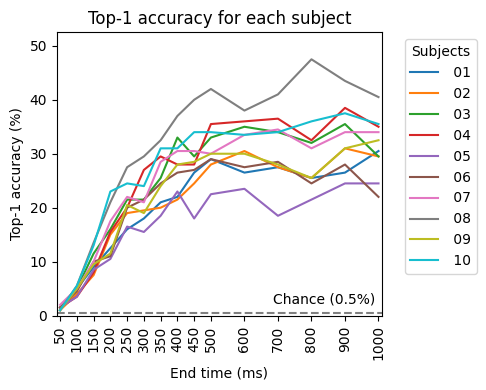

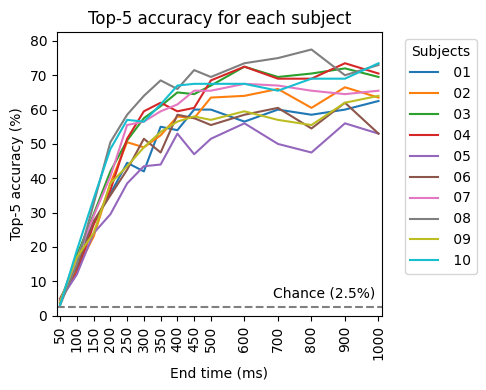

In [109]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

def plot_metric(metric_name, chance_level, ylabel, title, save_path):
    plt.figure(figsize=(5, 4))  # Adjust figure size as needed
    max_accuracy = 0  # Initialize max_accuracy to find the highest value for the y-axis limit

    # Plot each subject's data
    for subject in sorted(results[metric_name], key=int):
        window_ranges, accuracies = zip(*results[metric_name][subject])
        # If window_ranges already contains integers, this next line is not needed.
        # window_ranges = [int(i) for i in window_ranges]  # Cast window size to integer if needed
        plt.plot(window_ranges, accuracies, label=f" {subject}")
        max_accuracy = max(max_accuracy, max(accuracies))  # Update max_accuracy

    # Draw the chance level line
    plt.axhline(y=chance_level, color='grey', linestyle='--')

    # Set labels, title, and rotate x-axis labels to avoid overlap
    plt.xlabel('End time (ms)')
    plt.ylabel(ylabel)
    plt.title(title, fontsize=12)
    plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Set x-axis ticks and labels
    plt.xticks(window_ranges, rotation=90)

    plt.margins(x=0.01)

    # Set the y-axis to start from 0 and dynamically adjust the max value with a margin
    plt.ylim(0, max_accuracy + 5)
    plt.grid(False)
    plt.tight_layout()

    # Use axes coordinates to place the 'Chance' label just above the chance line within the plot
    plt.text(0.98, chance_level/max_accuracy + 0.02, f'Chance ({chance_level}%)', va='bottom', ha='right', 
             transform=plt.gca().transAxes, fontsize=10, color='black')

    # Save the figure to the specified path
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


# Call the plotting function for test_accuracy
plot_metric(
    'test_accuracy', 
    0.5, 
    'Top-1 accuracy (%)', 
    'Top-1 accuracy for each subject', 
    save_path='../plots/insubject_eeg_Growing_window_top1.png'
)

# Call the plotting function for top5_acc
plot_metric(
    'top5_acc', 
    2.5, 
    'Top-5 accuracy (%)', 
    'Top-5 accuracy for each subject',
    save_path='../plots/insubject_eeg_Growing_window_top5.png'
)

# Growing window (Average)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]


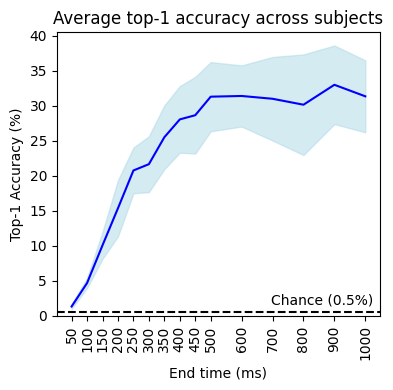

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]


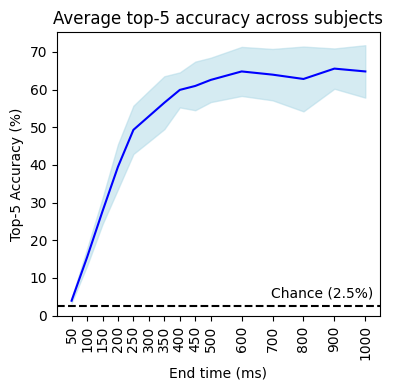

In [110]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/Reconstruction/outputs'  # Update with your actual path

# Function to calculate the max values of the metrics
def calculate_max_values(file_path):
    df = pd.read_csv(file_path)
    max_values = {
        'test_accuracy': df['test_accuracy'].max(),
        'top5_acc': df['top5_acc'].max()
    }
    return max_values

# Regular expression pattern to extract growing window and subject
pattern = re.compile(r'(\d+_\d+)_sub-(\d+)\.csv$')

# Dictionary to store the results by window
results = {'test_accuracy': {}, 'top5_acc': {}}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    match = pattern.search(filename)
    if match:
        window, subject = match.groups()
        window_size = int(window.split('_')[1])  # Assuming window is like '0_100'
        file_path = os.path.join(directory_path, filename)
        max_values = calculate_max_values(file_path)
        if window_size not in results['test_accuracy']:
            results['test_accuracy'][window_size] = []
            results['top5_acc'][window_size] = []
        results['test_accuracy'][window_size].append(max_values['test_accuracy'])
        results['top5_acc'][window_size].append(max_values['top5_acc'])

# Function to plot the average and standard deviation error bars for top-1 accuracy
def plot_avg_std_top1(metric, title, ylabel):
    plt.figure(figsize=(4, 4))
    windows = sorted(results[metric].keys())
    means = [np.mean(results[metric][w]) * 100 for w in windows]
    stds = [np.std(results[metric][w]) * 100 for w in windows]
    print(windows)
    plt.plot(windows, means, color='blue')
    plt.fill_between(windows, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color='lightblue', alpha=0.5)
    chance_level = 0.5
    plt.axhline(y=chance_level, color='black', linestyle='--', label='Chance (0.5%)')
    plt.text(0.98, 0.03, 'Chance (0.5%)', va='bottom', ha='right', transform=plt.gca().transAxes, fontsize=10, color='black')

    plt.xticks(windows)
    plt.xticks(rotation=90)
    plt.xlabel('End time (ms)')
    plt.ylabel(ylabel)
    plt.title(title, fontsize=12)
    plt.grid(False)
    plt.ylim(0)
    plt.tight_layout()
    plt.savefig(f"../plots/{title}_growing.png", dpi=300, bbox_inches='tight')
    plt.show()

# Function to plot the average and standard deviation error bars for top-5 accuracy
def plot_avg_std_top5(metric, title, ylabel):
    plt.figure(figsize=(4, 4))
    windows = sorted(results[metric].keys())
    means = [np.mean(results[metric][w]) * 100 for w in windows]
    stds = [np.std(results[metric][w]) * 100 for w in windows]
    print(windows)
    plt.plot(windows, means, color='blue')
    plt.fill_between(windows, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color='lightblue', alpha=0.5)
    chance_level = 2.5
    plt.axhline(y=chance_level, color='black', linestyle='--', label='Chance (2.5%)')
    plt.text(0.98, 0.055, 'Chance (2.5%)', va='bottom', ha='right', transform=plt.gca().transAxes, fontsize=10, color='black')

    plt.xticks(windows)
    plt.xticks(rotation=90)
    plt.xlabel('End time (ms)')
    plt.ylabel(ylabel)
    plt.title(title, fontsize=12)
    plt.grid(False)
    plt.ylim(0)
    plt.tight_layout()
    plt.savefig(f"../plots/{title}_growing.png", dpi=300, bbox_inches='tight')
    plt.show()

# Plot the average test_accuracy (TOP1) across subjects with standard deviation
plot_avg_std_top1('test_accuracy', 'Average top-1 accuracy across subjects', 'Top-1 Accuracy (%)')

# Plot the average top5_acc (TOP5) across subjects with standard deviation
plot_avg_std_top5('top5_acc', 'Average top-5 accuracy across subjects', 'Top-5 Accuracy (%)')

# slding window(average)

In [103]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/BrainAligning_retrieval/sliding_window_outputs'  # Update with your actual path

# Function to calculate the max values of the metrics
def calculate_max_values(file_path):
    df = pd.read_csv(file_path)
    max_values = {
        'test_accuracy': df['test_accuracy'].max() * 100,  # Convert to percentage
        'top5_acc': df['top5_acc'].max() * 100  # Convert to percentage
    }
    return max_values

# Regular expression pattern to extract growing window and subject
pattern = re.compile(r'(\d+_\d+)_sub-(\d+)\.csv$')

# Dictionary to store the results by subject and window
results = {'test_accuracy': {}, 'top5_acc': {}}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    match = pattern.search(filename)
    if match:
        window, subject = match.groups()
        window_size = int(window.split('_')[1])  # Assuming window is like '0_100'
        if subject not in results['test_accuracy']:
            results['test_accuracy'][subject] = []
            results['top5_acc'][subject] = []
        file_path = os.path.join(directory_path, filename)
        max_values = calculate_max_values(file_path)
        results['test_accuracy'][subject].append((window_size, max_values['test_accuracy']))
        results['top5_acc'][subject].append((window_size, max_values['top5_acc']))

# Sort the results by window size for each subject
for metric in results:
    for subject in results[metric]:
        results[metric][subject].sort()

# Plotting test_accuracy (TOP1) for all subjects

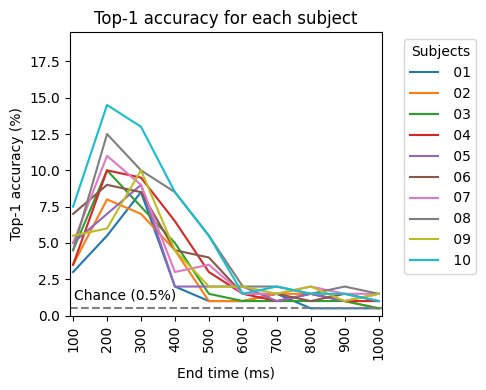

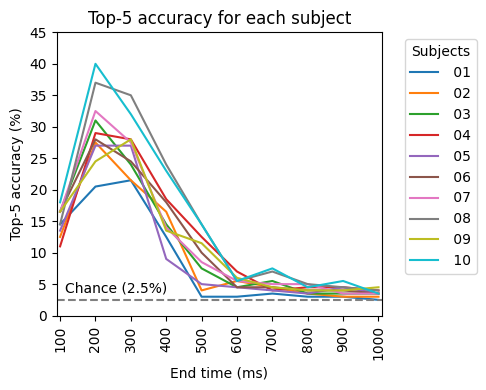

In [105]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

def plot_metric(metric_name, chance_level, ylabel, title, save_path):
    plt.figure(figsize=(5, 4))  # Adjust figure size as needed
    max_accuracy = 0  # Initialize max_accuracy to find the highest value for the y-axis limit

    # Plot each subject's data
    for subject in sorted(results[metric_name], key=int):
        window_ranges, accuracies = zip(*results[metric_name][subject])
        # If window_ranges already contains integers, this next line is not needed.
        # window_ranges = [int(i) for i in window_ranges]  # Cast window size to integer if needed
        plt.plot(window_ranges, accuracies, label=f" {subject}")
        max_accuracy = max(max_accuracy, max(accuracies))  # Update max_accuracy

    # Draw the chance level line
    plt.axhline(y=chance_level, color='grey', linestyle='--')

    # Set labels, title, and rotate x-axis labels to avoid overlap
    plt.xlabel('End time (ms)')
    plt.ylabel(ylabel)
    plt.title(title, fontsize=12)
    plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Set x-axis ticks and labels
    plt.xticks(window_ranges, rotation=90)

    plt.margins(x=0.01)

    # Set the y-axis to start from 0 and dynamically adjust the max value with a margin
    plt.ylim(0, max_accuracy + 5)
    plt.grid(False)
    plt.tight_layout()

    # Use axes coordinates to place the 'Chance' label just above the chance line within the plot
    plt.text(0.34, chance_level/max_accuracy + 0.01, f'Chance ({chance_level}%)', va='bottom', ha='right', 
             transform=plt.gca().transAxes, fontsize=10, color='black')

    # Save the figure to the specified path
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


# Call the plotting function for test_accuracy
plot_metric(
    'test_accuracy', 
    0.5, 
    'Top-1 accuracy (%)', 
    'Top-1 accuracy for each subject', 
    save_path='../plots/insubject_eeg_sliding_window_top1.png'
)

# Call the plotting function for top5_acc
plot_metric(
    'top5_acc', 
    2.5, 
    'Top-5 accuracy (%)', 
    'Top-5 accuracy for each subject',
    save_path='../plots/insubject_eeg_sliding_window_top5.png'
)

In [27]:
import os
import pandas as pd


# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/BrainAligning_retrieval/sliding_window_outputs'
# Function to calculate the averages of the last 10 epochs
def calculate_averages(file_path):
    df = pd.read_csv(file_path)
    last_10_epochs = df.tail(10)
    averages = {
        'test_accuracy': last_10_epochs['test_accuracy'].mean(),  # TOP1 accuracy
        'top5_acc': last_10_epochs['top5_acc'].mean()  # TOP5 accuracy
    }
    return averages

# Dictionary to store the results
results = {}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        results[filename] = calculate_averages(file_path)

# Sort the results by model (filename)
sorted_results = dict(sorted(results.items()))

# Display the results
for model, averages in sorted_results.items():
    print(f"Model: {model}")
    for metric, value in averages.items():
        # Convert to percentage and format with 2 decimal places
        formatted_value = "{:.2f}".format(value * 100)
        print(f"{metric}: {formatted_value}")
    print()

Model: ATM_S_reconstruction_scale_0_100_sub-01.csv
test_accuracy: 2.15
top5_acc: 13.05

Model: ATM_S_reconstruction_scale_0_100_sub-02.csv
test_accuracy: 1.80
top5_acc: 10.30

Model: ATM_S_reconstruction_scale_0_100_sub-03.csv
test_accuracy: 3.20
top5_acc: 13.25

Model: ATM_S_reconstruction_scale_0_100_sub-04.csv
test_accuracy: 2.10
top5_acc: 8.05

Model: ATM_S_reconstruction_scale_0_100_sub-05.csv
test_accuracy: 2.85
top5_acc: 10.80

Model: ATM_S_reconstruction_scale_0_100_sub-06.csv
test_accuracy: 5.00
top5_acc: 12.95

Model: ATM_S_reconstruction_scale_0_100_sub-07.csv
test_accuracy: 3.65
top5_acc: 12.05

Model: ATM_S_reconstruction_scale_0_100_sub-08.csv
test_accuracy: 3.50
top5_acc: 10.65

Model: ATM_S_reconstruction_scale_0_100_sub-09.csv
test_accuracy: 2.80
top5_acc: 12.55

Model: ATM_S_reconstruction_scale_0_100_sub-10.csv
test_accuracy: 5.00
top5_acc: 15.05

Model: ATM_S_reconstruction_scale_100_200_sub-01.csv
test_accuracy: 4.50
top5_acc: 18.20

Model: ATM_S_reconstruction_sca

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


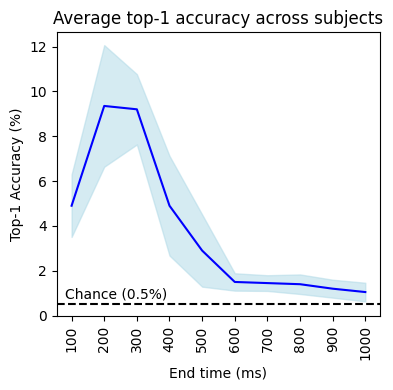

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


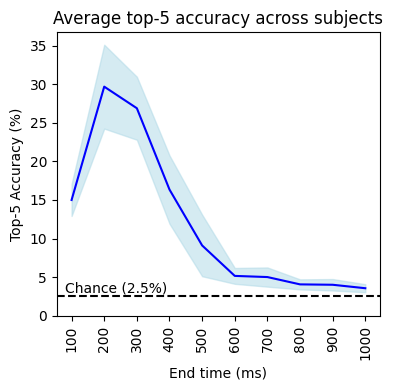

In [111]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/BrainAligning_retrieval/sliding_window_outputs'  # Update with your actual path

# Function to calculate the max values of the metrics
def calculate_max_values(file_path):
    df = pd.read_csv(file_path)
    max_values = {
        'test_accuracy': df['test_accuracy'].max(),
        'top5_acc': df['top5_acc'].max()
    }
    return max_values

# Regular expression pattern to extract growing window and subject
pattern = re.compile(r'(\d+_\d+)_sub-(\d+)\.csv$')

# Dictionary to store the results by window
results = {'test_accuracy': {}, 'top5_acc': {}}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    match = pattern.search(filename)
    if match:
        window, subject = match.groups()
        window_size = int(window.split('_')[1])  # Assuming window is like '0_100'
        file_path = os.path.join(directory_path, filename)
        max_values = calculate_max_values(file_path)
        if window_size not in results['test_accuracy']:
            results['test_accuracy'][window_size] = []
            results['top5_acc'][window_size] = []
        results['test_accuracy'][window_size].append(max_values['test_accuracy'])
        results['top5_acc'][window_size].append(max_values['top5_acc'])

# Function to plot the average and standard deviation error bars for top-1 accuracy
def plot_avg_std_top1(metric, title, ylabel):
    plt.figure(figsize=(4, 4))
    windows = sorted(results[metric].keys())
    means = [np.mean(results[metric][w]) * 100 for w in windows]
    stds = [np.std(results[metric][w]) * 100 for w in windows]
    print(windows)
    plt.plot(windows, means, color='blue')
    plt.fill_between(windows, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color='lightblue', alpha=0.5)
    chance_level = 0.5
    plt.axhline(y=chance_level, color='black', linestyle='--', label='Chance (0.5%)')
    plt.text(0.34, 0.05,  'Chance (0.5%)', va='bottom', ha='right', transform=plt.gca().transAxes, fontsize=10, color='black')

    plt.xticks(windows)
    plt.xticks(rotation=90)
    plt.xlabel('End time (ms)')
    plt.ylabel(ylabel)
    plt.title(title, fontsize=12)
    plt.grid(False)
    plt.ylim(0)
    plt.tight_layout()
    plt.savefig(f"../plots/{title}.png", dpi=300, bbox_inches='tight')
    plt.show()

# Function to plot the average and standard deviation error bars for top-5 accuracy
def plot_avg_std_top5(metric, title, ylabel):
    plt.figure(figsize=(4, 4))
    windows = sorted(results[metric].keys())
    means = [np.mean(results[metric][w]) * 100 for w in windows]
    stds = [np.std(results[metric][w]) * 100 for w in windows]
    print(windows)
    plt.plot(windows, means, color='blue')
    plt.fill_between(windows, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color='lightblue', alpha=0.5)
    chance_level = 2.5
    plt.axhline(y=chance_level, color='black', linestyle='--', label='Chance (2.5%)')
    plt.text(0.34, 0.07, 'Chance (2.5%)', va='bottom', ha='right', transform=plt.gca().transAxes, fontsize=10, color='black')

    plt.xticks(windows)
    plt.xticks(rotation=90)
    plt.xlabel('End time (ms)')
    plt.ylabel(ylabel)
    plt.title(title, fontsize=12)
    plt.grid(False)
    plt.ylim(0)
    plt.tight_layout()
    plt.savefig(f"../plots/{title}.png", dpi=300, bbox_inches='tight')
    plt.show()
# Plot the average test_accuracy (TOP1) across subjects with standard deviation
plot_avg_std_top1('test_accuracy', 'Average top-1 accuracy across subjects', 'Top-1 Accuracy (%)')

# Plot the average top5_acc (TOP5) across subjects with standard deviation
plot_avg_std_top5('top5_acc', 'Average top-5 accuracy across subjects', 'Top-5 Accuracy (%)')

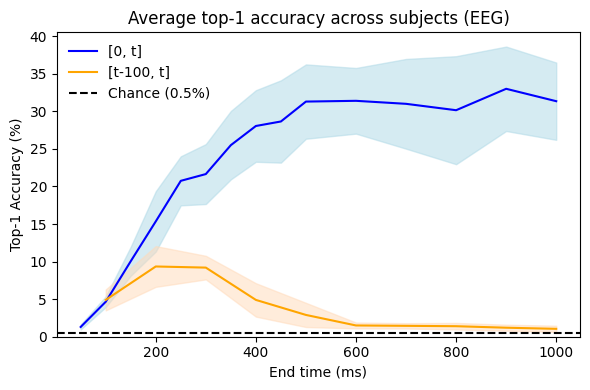

In [63]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Directory path containing the CSV files
directory_path1 = '/home/ldy/Workspace/Reconstruction/outputs'  # Update with your actual path
directory_path2 = '/home/ldy/Workspace/BrainAligning_retrieval/sliding_window_outputs'  # Update with your actual path

# Function to read the data from a directory and calculate the max values
def read_data(directory_path):
    pattern = re.compile(r'(\d+_\d+)_sub-(\d+)\.csv$')
    results = {'test_accuracy': {}, 'top5_acc': {}}

    for filename in os.listdir(directory_path):
        match = pattern.search(filename)
        if match:
            window, subject = match.groups()
            window_size = int(window.split('_')[1])  # Assuming window is like '0_100'
            file_path = os.path.join(directory_path, filename)
            df = pd.read_csv(file_path)
            max_values = {
                'test_accuracy': df['test_accuracy'].max(),
                'top5_acc': df['top5_acc'].max()
            }
            if window_size not in results['test_accuracy']:
                results['test_accuracy'][window_size] = []
                results['top5_acc'][window_size] = []
            results['test_accuracy'][window_size].append(max_values['test_accuracy'])
            results['top5_acc'][window_size].append(max_values['top5_acc'])
    return results

# Read data from both directories
results1 = read_data(directory_path1)
results2 = read_data(directory_path2)

def plot_avg_std_both(metrics, title, ylabel):
    plt.figure(figsize=(6, 4))

    # Plot for the first dataset
    windows1 = sorted(metrics[0].keys())
    means1 = [np.mean(metrics[0][w]) * 100 for w in windows1]
    stds1 = [np.std(metrics[0][w]) * 100 for w in windows1]
    plt.plot(windows1, means1, color='blue', label='[0, t]')
    plt.fill_between(windows1, np.array(means1) - np.array(stds1), np.array(means1) + np.array(stds1), color='lightblue', alpha=0.5)

    # Plot for the second dataset
    windows2 = sorted(metrics[1].keys())
    means2 = [np.mean(metrics[1][w]) * 100 for w in windows2]
    stds2 = [np.std(metrics[1][w]) * 100 for w in windows2]
    plt.plot(windows2, means2, color='orange', label='[t-100, t]')
    plt.fill_between(windows2, np.array(means2) - np.array(stds2), np.array(means2) + np.array(stds2), color='peachpuff', alpha=0.5)

    # Plot the chance line
    plt.axhline(y=0.5, color='black', linestyle='--', label='Chance (0.5%)')

    plt.xlabel('End time (ms)')
    plt.ylabel(ylabel)
    plt.title(title)
    # Hide the legend's border
    legend = plt.legend(frameon=False)
    # Set the y-axis to start from 0
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()


# Plot the average test_accuracy (TOP1) across subjects with standard deviation from both directories
plot_avg_std_both([results1['test_accuracy'], results2['test_accuracy']], 'Average top-1 accuracy across subjects (EEG)', 'Top-1 Accuracy (%)')

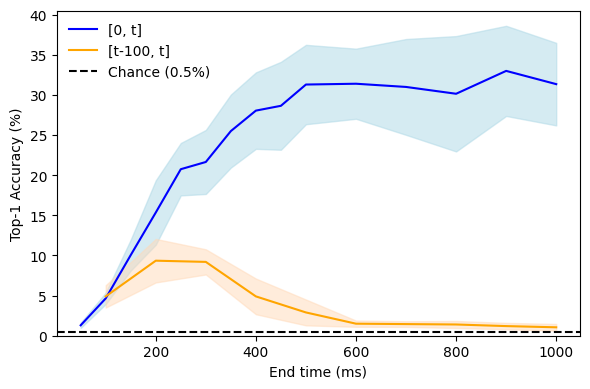

In [114]:
def plot_avg_std_both(metrics, title, ylabel, save_path):
    plt.figure(figsize=(6, 4))

    # Plot for the first dataset
    windows1 = sorted(metrics[0].keys())
    means1 = [np.mean(metrics[0][w]) * 100 for w in windows1]
    stds1 = [np.std(metrics[0][w]) * 100 for w in windows1]
    plt.plot(windows1, means1, color='blue', label='[0, t]')
    plt.fill_between(windows1, np.array(means1) - np.array(stds1), np.array(means1) + np.array(stds1), color='lightblue', alpha=0.5)

    # Plot for the second dataset
    windows2 = sorted(metrics[1].keys())
    means2 = [np.mean(metrics[1][w]) * 100 for w in windows2]
    stds2 = [np.std(metrics[1][w]) * 100 for w in windows2]
    plt.plot(windows2, means2, color='orange', label='[t-100, t]')
    plt.fill_between(windows2, np.array(means2) - np.array(stds2), np.array(means2) + np.array(stds2), color='peachpuff', alpha=0.5)

    # Plot the chance line
    plt.axhline(y=0.5, color='black', linestyle='--', label='Chance (0.5%)')

    plt.xlabel('End time (ms)')
    plt.ylabel(ylabel)
    # plt.title(title, fontsize=16)
    legend = plt.legend(frameon=False)
    plt.ylim(bottom=0)
    plt.tight_layout()
    
    # Save the figure with high resolution
    plt.savefig(save_path, dpi=300)
    plt.show()

# Call the function and specify the path where the image will be saved
plot_avg_std_both([results1['test_accuracy'], results2['test_accuracy']], 'Average top-1 accuracy across subjects (EEG)', 'Top-1 Accuracy (%)', '../plots/fig-window-eeg.png')